**Лабораторна робота №3 “Unsupervised Learning”**

Мета: навчитись робити передобробку даних та використовувати інструменти для кластеризації (Unsupervised Learning).
Завдання:
Прочитати опис та викачати дані з Kaggle змагання https://www.kaggle.com/c/titanic/data . 
Обробити дані для подальшого використання у кластеризації (вирішити проблему з missing data, закодувати змінні).
Провести кластеризацію даних за допомогою алгоритмів кластеризації з різними параметрами.
Візуалізувати та оформити результати.
Лабораторна повинна бути оформлена у вигляді Jupyter Notebook, який можна виконати локально, або Kaggle Notebook, або Google Collab. У всіх випадках для здачі потрібно надіслати посилання на ноутбук на GitHub/Kaggle/Collab.
	Теоретичний базис для виконання лабораторної - лекції №1-№6, №9.

> Тищенко Н.А. ДА-02

Проведемо тестування програми чи наші файли заванатажились успішно.

In [154]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lab3-titatic-datasets/titanic/train.csv
/kaggle/input/lab3-titatic-datasets/titanic/test.csv
/kaggle/input/lab3-titatic-datasets/titanic/gender_submission.csv


In [155]:
train_data = pd.read_csv("/kaggle/input/lab3-titatic-datasets/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Зчитаємо тренувальні дані

In [156]:
test_data = pd.read_csv("/kaggle/input/lab3-titatic-datasets/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Зчитаємо тестові дані

In [157]:
train_data.shape

(891, 12)

In [158]:
test_data.shape

(418, 11)

Визначимо розмір. Тепер проведемо аналіз на відсутні значення.

In [159]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [160]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Визначимо присутні типи.

In [161]:
missing_values_train = pd.DataFrame((train_data.isnull().sum()).sort_values(ascending=False))
missing_values_train

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0


In [162]:
missing_values_test = pd.DataFrame((test_data.isnull().sum()).sort_values(ascending=False))
missing_values_test

,0
Cabin,327
Age,86
Fare,1
PassengerId,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0
Ticket,0


Заповнимо відсутні значення модою або медіаною.

In [163]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

Видалимо стовпчики, що не несуть корисної інформації для кластеризації або ж забагато відсутніх значень.

In [164]:
train_data.drop(['Name', 'Cabin'], axis=1, inplace=True)
test_data.drop(['Name', 'Cabin'], axis=1, inplace=True)

Виведемо інформацію, скільки чоловіків та жінок змогли вижити у тренувальному наборі даних.

In [165]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [166]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


Закодуємо значення за допомогою LabelEncoder.

class sklearn.preprocessing.LabelEncoder
Encode target labels with value between 0 and n_classes-1.
This transformer should be used to encode target values, i.e. y, and not the input X.

In [167]:
from sklearn.preprocessing import LabelEncoder

lencoder = LabelEncoder()

train_data["Sex"]= lencoder.fit_transform(train_data["Sex"])
train_data = pd.get_dummies(train_data, columns=['Embarked'])

test_data["Sex"]= lencoder.transform(test_data["Sex"])
test_data = pd.get_dummies(test_data, columns=['Embarked'])

Тепер проведемо пробну кластеризацію за допомогою RandomForestClassifier.
*
Random forests are a popular supervised machine learning algorithm. 

Random forests are for supervised machine learning, where there is a labeled target variable.
Random forests can be used for solving regression (numeric target variable) and classification (categorical target variable) problems.
Random forests are an ensemble method, meaning they combine predictions from other models.
Each of the smaller models in the random forest ensemble is a decision tree.*

In [168]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])
model = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=35)
model.fit(X, y)
predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [169]:
train_data.drop(['Ticket', 'PassengerId'], axis=1, inplace=True)
test_data.drop(['Ticket', 'PassengerId'], axis=1, inplace=True)

Тепер проведемо кластеризацію на різних кількостях кластерів за допомогою наступних алгоритмів:

**KMeans**

*The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset. There are many different types of clustering methods, but k-means is one of the oldest and most approachable. These traits make implementing k-means clustering in Python reasonably straightforward, even for novice programmers and data scientists.

If you’re interested in learning how and when to implement k-means clustering in Python, then this is the right place. You’ll walk through an end-to-end example of k-means clustering using Python, from preprocessing the data to evaluating results.*

**AgglomerativeClustering**

*Agglomerative Hierarchical Clustering is an unsupervised learning algorithm that links data points based on distance to form a cluster, and then links those already clustered points into another cluster, creating a structure of clusters with subclusters.

It is easily implemented using Scikit-Learn which already has single, average, complete and ward linking methods available.*

In [170]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

def cluster_kmeans(dataset, n_clusters):
    cluster_model = KMeans(n_clusters=n_clusters, random_state=35)
    cluster_model.fit(dataset)
    labels = cluster_model.labels_
    score = silhouette_score(dataset, labels, metric='euclidean')
    print(f"Silhouette Score: KMeans with {n_clusters} clusters: {score}\n")
    print(dataset.groupby(cluster_model.labels_).mean())
    return labels

def cluster_algo(dataset, n_clusters):
    cluster_model = AgglomerativeClustering(n_clusters=n_clusters);
    cluster_model.fit(dataset)
    labels = cluster_model.labels_
    score = silhouette_score(dataset, labels, metric='euclidean')
    print(f"Silhouette Score: AgglomerativeClustering with {n_clusters} clusters: {score}\n")
    print(dataset.groupby(cluster_model.labels_).mean())
    return labels
    

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: KMeans with 2 clusters: 0.7913542436674801

   Survived    Pclass       Sex        Age     SibSp     Parch        Fare  \
0  0.361575  2.391408  0.665871  29.221062  0.514320  0.349642   22.411942   
1  0.735849  1.000000  0.358491  31.583396  0.660377  0.886792  187.032858   

   Embarked_C  Embarked_Q  Embarked_S  
0    0.165871    0.091885    0.742243  
1    0.547170    0.000000    0.452830  


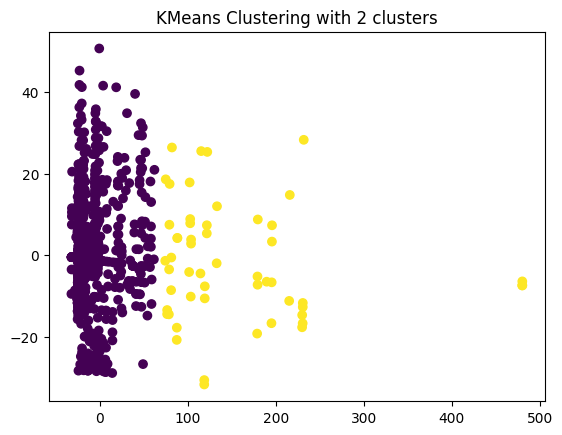

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: KMeans with 3 clusters: 0.6620669283125392

   Survived    Pclass       Sex        Age     SibSp     Parch        Fare  \
0  0.319616  2.551440  0.688615  28.278807  0.429355  0.344307   15.453954   
1  0.669014  1.246479  0.471831  34.710704  0.971831  0.478873   83.393280   
2  0.700000  1.000000  0.400000  30.850000  0.750000  1.050000  279.308545   

   Embarked_C  Embarked_Q  Embarked_S  
0    0.145405    0.102881    0.751715  
1    0.352113    0.014085    0.633803  
2    0.600000    0.000000    0.400000  


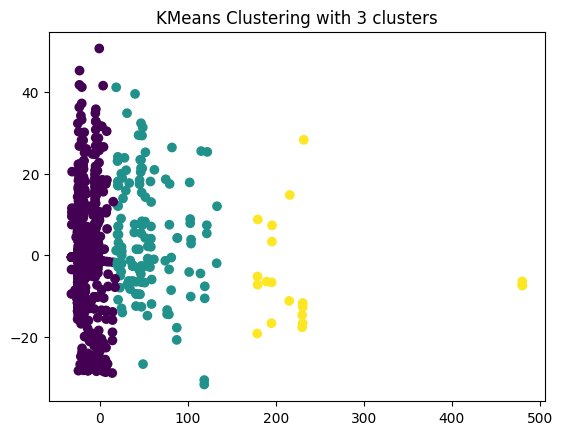

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: KMeans with 4 clusters: 0.6356852502786156

   Survived    Pclass       Sex        Age     SibSp     Parch        Fare  \
0  0.624060  1.353383  0.511278  33.812030  1.165414  0.556391   72.457049   
1  0.714286  1.000000  0.285714  31.740571  0.685714  0.914286  190.907020   
2  0.320833  2.554167  0.690278  28.398958  0.398611  0.323611   15.053373   
3  1.000000  1.000000  0.666667  35.333333  0.000000  0.333333  512.329200   

   Embarked_C  Embarked_Q  Embarked_S  
0    0.345865    0.015038    0.639098  
1    0.428571    0.000000    0.571429  
2    0.144444    0.104167    0.751389  
3    1.000000    0.000000    0.000000  


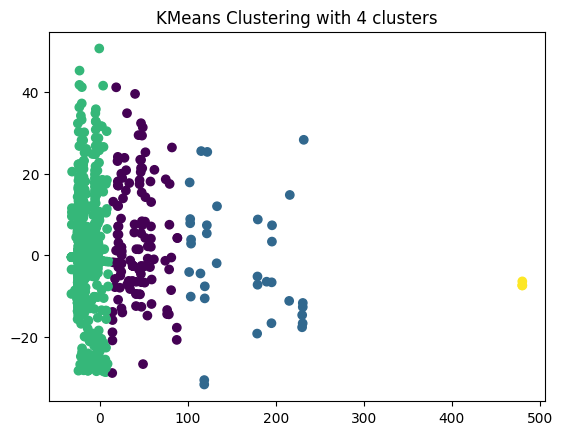

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: KMeans with 5 clusters: 0.6149968527435674

   Survived    Pclass       Sex        Age     SibSp     Parch        Fare  \
0  0.321629  2.564607  0.691011  28.286868  0.397472  0.313202   14.769603   
1  0.757576  1.000000  0.333333  32.027879  0.606061  0.787879  131.108200   
2  1.000000  1.000000  0.666667  35.333333  0.000000  0.333333  512.329200   
3  0.587302  1.412698  0.523810  34.500000  1.174603  0.555556   65.597224   
4  0.647059  1.000000  0.352941  30.058824  0.882353  1.176471  238.187253   

   Embarked_C  Embarked_Q  Embarked_S  
0    0.140449    0.105337    0.754213  
1    0.515152    0.000000    0.484848  
2    1.000000    0.000000    0.000000  
3    0.309524    0.015873    0.674603  
4    0.529412    0.000000    0.470588  


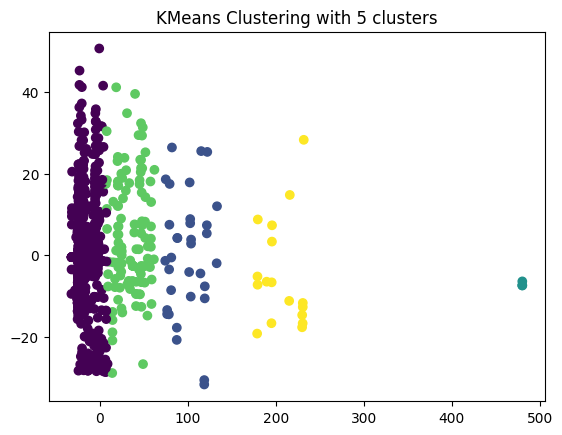

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: KMeans with 6 clusters: 0.4491960052749601

   Survived    Pclass       Sex        Age     SibSp     Parch        Fare  \
0  0.324955  2.687612  0.682226  23.411580  0.447038  0.290844   13.587095   
1  0.757576  1.000000  0.333333  32.027879  0.606061  0.787879  131.108200   
2  0.647059  1.000000  0.352941  30.058824  0.882353  1.176471  238.187253   
3  1.000000  1.000000  0.666667  35.333333  0.000000  0.333333  512.329200   
4  0.608333  1.408333  0.516667  33.700000  1.216667  0.533333   66.823612   
5  0.304348  2.099379  0.720497  45.981366  0.223602  0.416149   19.840761   

   Embarked_C  Embarked_Q  Embarked_S  
0    0.149013    0.123878    0.727110  
1    0.515152    0.000000    0.484848  
2    0.529412    0.000000    0.470588  
3    1.000000    0.000000    0.000000  
4    0.300000    0.016667    0.683333  
5    0.124224    0.037267    0.838509  


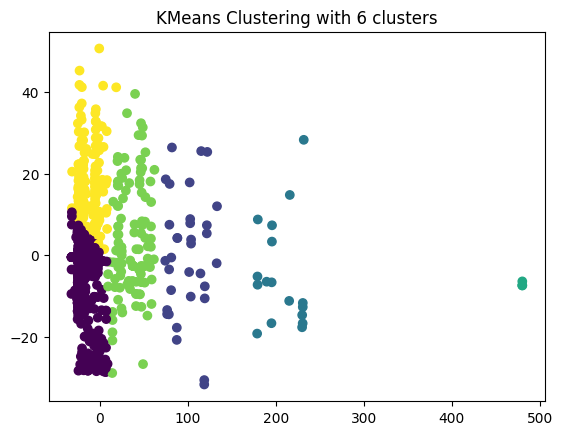

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: KMeans with 7 clusters: 0.4792861378305419

   Survived    Pclass       Sex        Age     SibSp     Parch        Fare  \
0  0.639640  1.333333  0.504505  35.099099  1.072072  0.432432   68.552028   
1  0.493056  2.305556  0.548611  15.887153  1.375000  0.916667   27.705787   
2  0.647059  1.000000  0.352941  30.058824  0.882353  1.176471  238.187253   
3  1.000000  1.000000  0.666667  35.333333  0.000000  0.333333  512.329200   
4  0.757576  1.000000  0.333333  32.027879  0.606061  0.787879  131.108200   
5  0.321678  2.048951  0.706294  47.055944  0.237762  0.461538   20.813433   
6  0.261364  2.797727  0.731818  26.305682  0.181818  0.106818    9.559042   

   Embarked_C  Embarked_Q  Embarked_S  
0    0.297297    0.018018    0.684685  
1    0.194444    0.062500    0.743056  
2    0.529412    0.000000    0.470588  
3    1.000000    0.000000    0.000000  
4    0.515152    0.000000    0.484848  
5    0.104895    0.034965    0.860140  
6    0.143182    0.138636    0.71

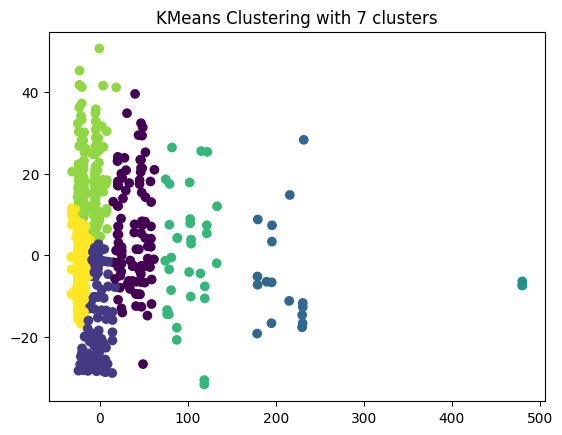

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: KMeans with 8 clusters: 0.4634454459572907

   Survived    Pclass       Sex        Age     SibSp     Parch        Fare  \
0  0.586207  1.465517  0.586207  32.775862  0.706897  0.568966   52.484198   
1  0.647059  1.000000  0.352941  30.058824  0.882353  1.176471  238.187253   
2  0.781250  1.000000  0.312500  31.466250  0.593750  0.812500  131.879550   
3  0.258065  2.794931  0.737327  26.313364  0.177419  0.101382    9.453234   
4  1.000000  1.000000  0.666667  35.333333  0.000000  0.333333  512.329200   
5  0.314286  2.057143  0.714286  47.292857  0.228571  0.428571   20.275953   
6  0.615385  1.307692  0.446154  36.123077  1.430769  0.492308   79.013718   
7  0.514085  2.352113  0.535211  15.825704  1.330986  0.873239   26.523385   

   Embarked_C  Embarked_Q  Embarked_S  
0    0.258621    0.000000    0.741379  
1    0.529412    0.000000    0.470588  
2    0.500000    0.000000    0.500000  
3    0.135945    0.140553    0.723502  
4    1.000000    0.000000    0.0000

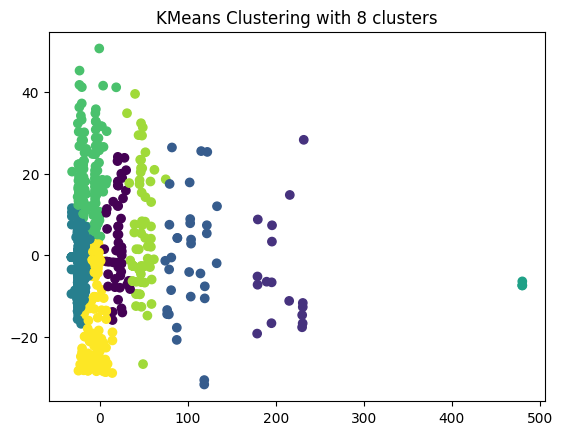

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: KMeans with 9 clusters: 0.47902162069122445

   Survived    Pclass       Sex        Age     SibSp     Parch        Fare  \
0  0.593220  1.423729  0.576271  35.338983  0.610169  0.559322   52.687503   
1  0.259953  2.796253  0.733021  26.142857  0.161593  0.084309    9.244378   
2  0.647059  1.000000  0.352941  30.058824  0.882353  1.176471  238.187253   
3  0.757576  1.000000  0.333333  32.027879  0.606061  0.787879  131.108200   
4  1.000000  1.000000  0.666667  35.333333  0.000000  0.333333  512.329200   
5  0.543210  2.629630  0.518519   7.175926  1.802469  1.283951   26.690431   
6  0.634921  1.301587  0.428571  35.031746  1.460317  0.460317   78.874405   
7  0.252525  2.151515  0.747475  50.787879  0.131313  0.222222   17.066710   
8  0.440367  2.000000  0.623853  31.403670  0.688073  0.633028   26.648432   

   Embarked_C  Embarked_Q  Embarked_S  
0    0.271186    0.000000    0.728814  
1    0.140515    0.140515    0.718970  
2    0.529412    0.000000    0.47058

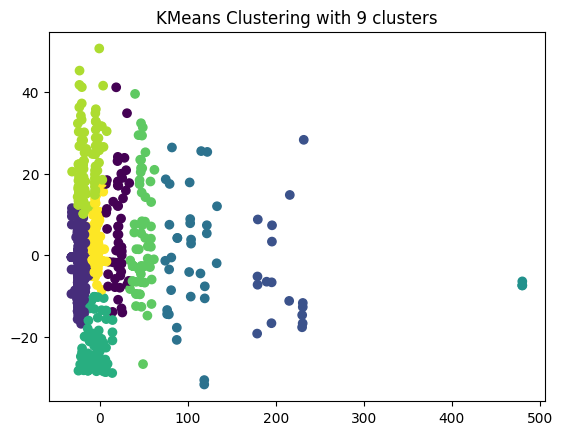

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: KMeans with 10 clusters: 0.4005316557181713

   Survived    Pclass       Sex        Age     SibSp     Parch        Fare  \
0  0.547945  2.684932  0.520548   5.976027  1.917808  1.356164   26.827796   
1  0.757576  1.000000  0.333333  32.027879  0.606061  0.787879  131.108200   
2  0.246988  2.837349  0.716867  20.403614  0.210843  0.102410    9.422616   
3  1.000000  1.000000  0.666667  35.333333  0.000000  0.333333  512.329200   
4  0.647059  1.000000  0.352941  30.058824  0.882353  1.176471  238.187253   
5  0.603448  1.431034  0.568966  34.724138  0.620690  0.568966   52.742388   
6  0.634921  1.301587  0.428571  35.031746  1.460317  0.460317   78.874405   
7  0.256055  2.771626  0.754325  30.901384  0.141869  0.065744    9.222359   
8  0.465517  2.017241  0.594828  30.577586  0.672414  0.698276   26.440337   
9  0.260274  1.876712  0.739726  54.321918  0.123288  0.205479   20.522433   

   Embarked_C  Embarked_Q  Embarked_S  
0    0.150685    0.054795    0.794521 

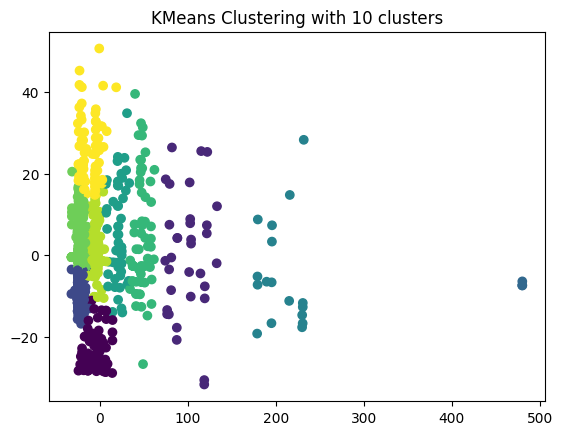

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: KMeans with 11 clusters: 0.46185536029095264

    Survived    Pclass       Sex        Age     SibSp     Parch        Fare  \
0   0.268542  2.823529  0.723785  25.118926  0.173913  0.092072    9.341559   
1   0.647059  1.000000  0.352941  30.058824  0.882353  1.176471  238.187253   
2   0.733333  1.000000  0.466667  30.466667  0.733333  0.933333  112.933880   
3   1.000000  1.000000  0.666667  35.333333  0.000000  0.333333  512.329200   
4   0.191011  2.606742  0.786517  41.308989  0.112360  0.112360    9.921488   
5   0.611111  1.407407  0.592593  33.703704  0.722222  0.462963   54.797919   
6   0.547945  2.684932  0.520548   6.003425  1.863014  1.342466   26.462727   
7   0.309091  1.563636  0.727273  55.727273  0.163636  0.236364   25.124545   
8   0.777778  1.000000  0.222222  33.328889  0.500000  0.666667  146.253467   
9   0.452174  2.000000  0.600000  30.521739  0.686957  0.713043   27.278623   
10  0.639344  1.311475  0.426230  35.344262  1.475410  0.475410   7

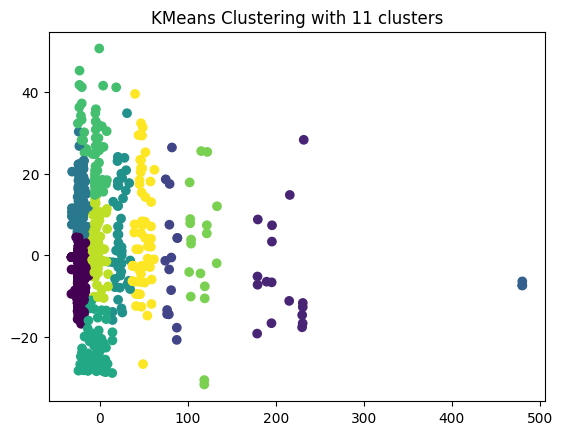

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: KMeans with 12 clusters: 0.41584876604144

    Survived    Pclass       Sex        Age     SibSp     Parch        Fare  \
0   0.289157  2.831325  0.686747  18.996506  0.216867  0.162651    9.893826   
1   0.777778  1.000000  0.222222  33.328889  0.500000  0.666667  146.253467   
2   1.000000  1.000000  0.666667  35.333333  0.000000  0.333333  512.329200   
3   0.638298  1.425532  0.404255  27.382979  1.659574  0.553191   77.674732   
4   0.263889  1.888889  0.736111  54.090278  0.125000  0.208333   20.119908   
5   0.584906  1.433962  0.584906  33.528302  0.622642  0.490566   51.368713   
6   0.647059  1.000000  0.352941  30.058824  0.882353  1.176471  238.187253   
7   0.491803  2.639344  0.557377   6.079180  2.245902  1.459016   29.685997   
8   0.252492  2.780731  0.757475  30.666113  0.146179  0.063123    9.130811   
9   0.478261  2.026087  0.582609  30.591304  0.669565  0.704348   26.206340   
10  0.733333  1.000000  0.466667  30.466667  0.733333  0.933333  112.9

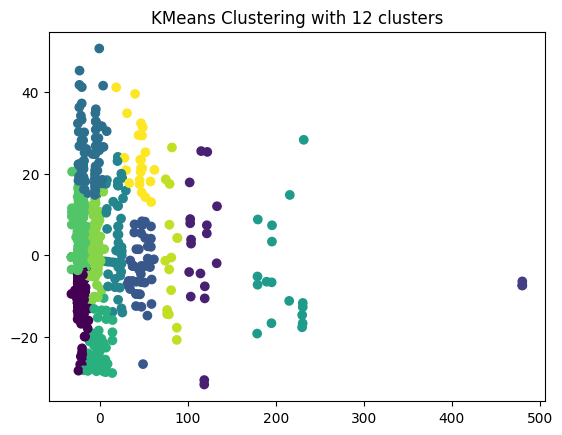

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: KMeans with 13 clusters: 0.42954970935853964

    Survived    Pclass       Sex        Age     SibSp     Parch        Fare  \
0   0.205882  2.602941  0.779412  48.183824  0.073529  0.132353   10.301778   
1   0.647059  1.000000  0.352941  30.058824  0.882353  1.176471  238.187253   
2   0.636364  1.045455  0.500000  53.863636  0.772727  0.454545   77.022355   
3   1.000000  1.000000  0.666667  35.333333  0.000000  0.333333  512.329200   
4   0.266667  2.840000  0.700000  19.790000  0.206667  0.120000    9.524445   
5   0.733333  1.000000  0.466667  30.466667  0.733333  0.933333  112.933880   
6   0.596154  1.480769  0.596154  32.519231  0.711538  0.557692   52.213463   
7   0.472727  2.027273  0.590909  29.718182  0.681818  0.709091   26.448446   
8   0.542857  2.685714  0.514286   5.689286  1.928571  1.357143   26.800773   
9   0.251825  2.781022  0.751825  29.250000  0.149635  0.054745    9.194355   
10  0.347826  1.347826  0.717391  52.619565  0.260870  0.304348   2

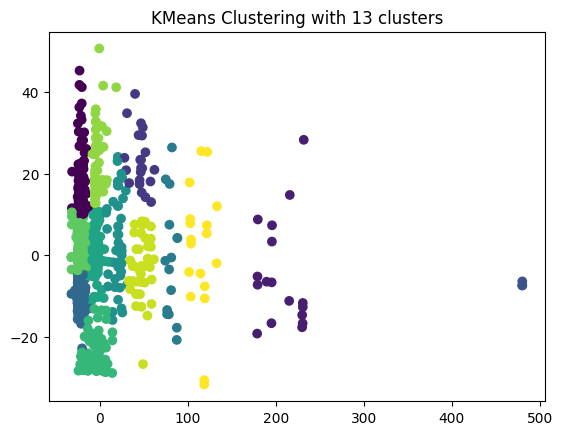

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: KMeans with 14 clusters: 0.42977422693888484

    Survived    Pclass       Sex        Age     SibSp     Parch        Fare  \
0   0.630435  1.434783  0.391304  27.478261  1.695652  0.543478   77.985959   
1   0.253623  2.782609  0.753623  29.320652  0.148551  0.054348    9.185157   
2   0.777778  1.000000  0.222222  33.328889  0.500000  0.666667  146.253467   
3   1.000000  1.000000  0.666667  35.333333  0.000000  0.333333  512.329200   
4   0.625000  1.000000  0.375000  30.375000  1.750000  2.000000  258.973950   
5   0.196970  2.590909  0.772727  48.462121  0.075758  0.136364   10.373802   
6   0.477064  2.036697  0.587156  29.733945  0.688073  0.715596   26.327790   
7   0.733333  1.000000  0.466667  30.466667  0.733333  0.933333  112.933880   
8   0.531250  2.656250  0.515625   5.762969  2.062500  1.406250   28.161262   
9   0.354167  1.395833  0.687500  52.114583  0.270833  0.416667   29.773438   
10  0.592593  1.037037  0.555556  53.222222  0.814815  0.370370   7

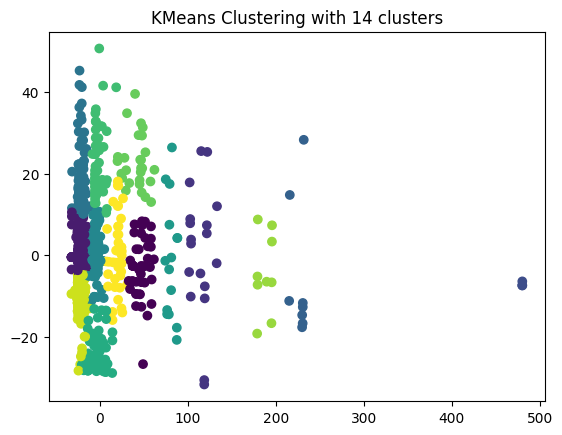

Silhouette Score: AgglomerativeClustering with 2 clusters: 0.8466218905060603

   Survived    Pclass       Sex        Age     SibSp     Parch        Fare  \
0  0.376579  2.338691  0.653272  29.327405  0.517796  0.366246   26.530170   
1  0.700000  1.000000  0.400000  30.850000  0.750000  1.050000  279.308545   

   Embarked_C  Embarked_Q  Embarked_S  
0    0.179104    0.088404    0.732491  
1    0.600000    0.000000    0.400000  


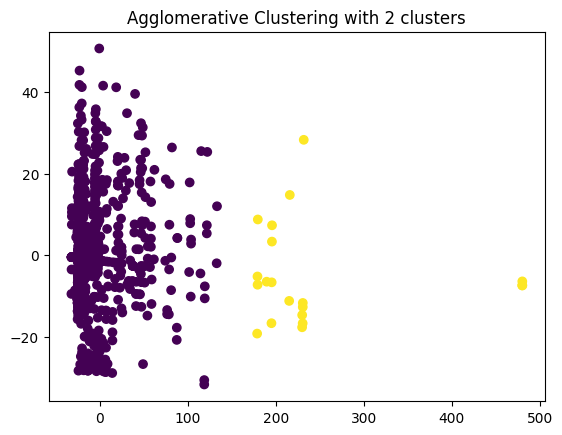

Silhouette Score: AgglomerativeClustering with 3 clusters: 0.6567471509774108

   Survived    Pclass       Sex        Age     SibSp     Parch        Fare  \
0  0.700000  1.000000  0.400000  30.850000  0.750000  1.050000  279.308545   
1  0.646667  1.300000  0.473333  33.972800  1.060000  0.560000   81.482999   
2  0.320388  2.554785  0.690707  28.360957  0.404993  0.325936   15.097543   

   Embarked_C  Embarked_Q  Embarked_S  
0    0.600000    0.000000    0.400000  
1    0.346667    0.013333    0.640000  
2    0.144244    0.104022    0.751734  


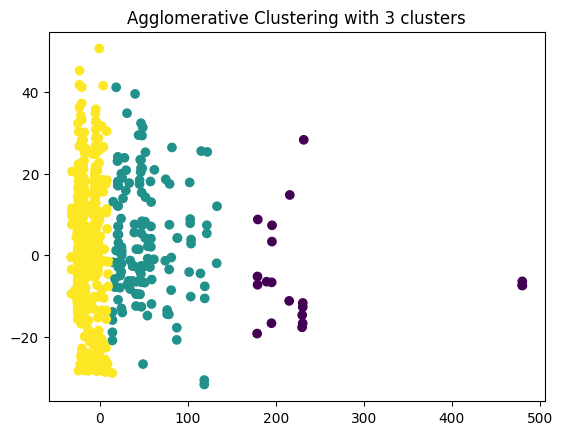

Silhouette Score: AgglomerativeClustering with 4 clusters: 0.6593267084078485

   Survived    Pclass       Sex        Age     SibSp     Parch        Fare  \
0  0.646667  1.300000  0.473333  33.972800  1.060000  0.560000   81.482999   
1  0.647059  1.000000  0.352941  30.058824  0.882353  1.176471  238.187253   
2  0.320388  2.554785  0.690707  28.360957  0.404993  0.325936   15.097543   
3  1.000000  1.000000  0.666667  35.333333  0.000000  0.333333  512.329200   

   Embarked_C  Embarked_Q  Embarked_S  
0    0.346667    0.013333    0.640000  
1    0.529412    0.000000    0.470588  
2    0.144244    0.104022    0.751734  
3    1.000000    0.000000    0.000000  


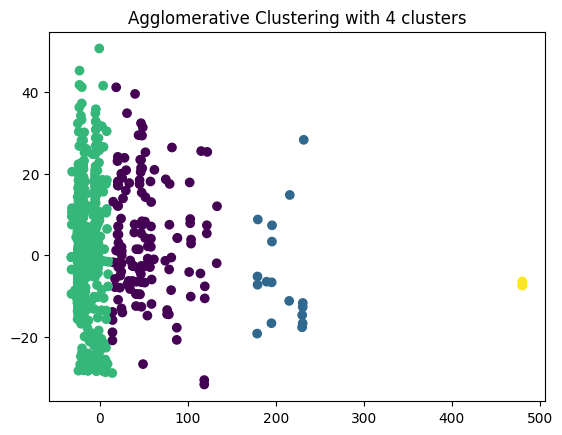

Silhouette Score: AgglomerativeClustering with 5 clusters: 0.6216593057509833

   Survived    Pclass       Sex        Age     SibSp     Parch        Fare  \
0  0.320388  2.554785  0.690707  28.360957  0.404993  0.325936   15.097543   
1  0.757576  1.000000  0.333333  32.027879  0.606061  0.787879  131.108200   
2  0.615385  1.384615  0.512821  34.521368  1.188034  0.495726   67.486148   
3  1.000000  1.000000  0.666667  35.333333  0.000000  0.333333  512.329200   
4  0.647059  1.000000  0.352941  30.058824  0.882353  1.176471  238.187253   

   Embarked_C  Embarked_Q  Embarked_S  
0    0.144244    0.104022    0.751734  
1    0.515152    0.000000    0.484848  
2    0.299145    0.017094    0.683761  
3    1.000000    0.000000    0.000000  
4    0.529412    0.000000    0.470588  


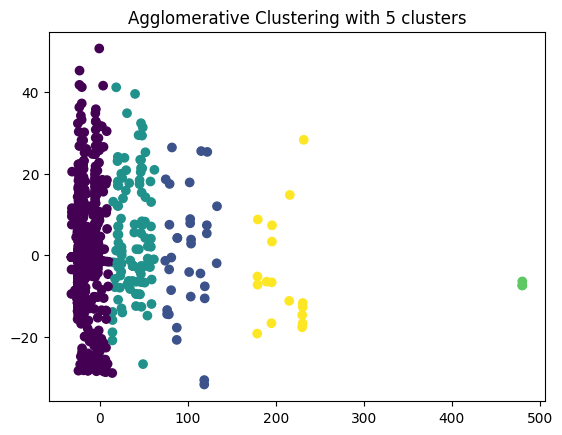

Silhouette Score: AgglomerativeClustering with 6 clusters: 0.4187852125436658

   Survived    Pclass       Sex        Age     SibSp     Parch        Fare  \
0  0.332753  2.655052  0.684669  23.727787  0.456446  0.355401   14.649200   
1  0.757576  1.000000  0.333333  32.027879  0.606061  0.787879  131.108200   
2  0.615385  1.384615  0.512821  34.521368  1.188034  0.495726   67.486148   
3  1.000000  1.000000  0.666667  35.333333  0.000000  0.333333  512.329200   
4  0.647059  1.000000  0.352941  30.058824  0.882353  1.176471  238.187253   
5  0.272109  2.163265  0.714286  46.452381  0.204082  0.210884   16.848214   

   Embarked_C  Embarked_Q  Embarked_S  
0    0.160279    0.120209    0.719512  
1    0.515152    0.000000    0.484848  
2    0.299145    0.017094    0.683761  
3    1.000000    0.000000    0.000000  
4    0.529412    0.000000    0.470588  
5    0.081633    0.040816    0.877551  


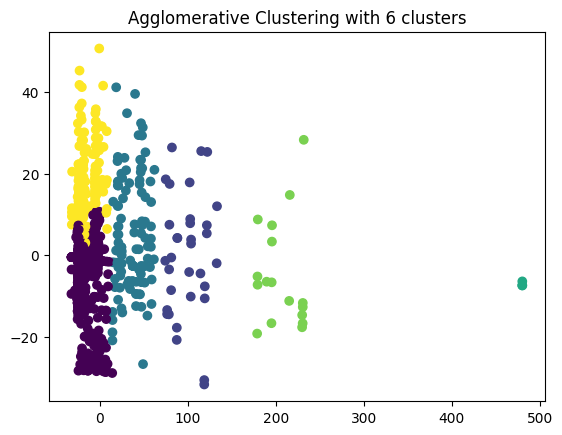

Silhouette Score: AgglomerativeClustering with 7 clusters: 0.44215243862168835

   Survived    Pclass       Sex        Age     SibSp     Parch        Fare  \
0  0.489011  2.274725  0.565934  20.237637  1.126374  0.923077   26.530265   
1  0.757576  1.000000  0.333333  32.027879  0.606061  0.787879  131.108200   
2  0.615385  1.384615  0.512821  34.521368  1.188034  0.495726   67.486148   
3  1.000000  1.000000  0.666667  35.333333  0.000000  0.333333  512.329200   
4  0.647059  1.000000  0.352941  30.058824  0.882353  1.176471  238.187253   
5  0.272109  2.163265  0.714286  46.452381  0.204082  0.210884   16.848214   
6  0.260204  2.831633  0.739796  25.348214  0.145408  0.091837    9.132992   

   Embarked_C  Embarked_Q  Embarked_S  
0    0.186813    0.054945    0.758242  
1    0.515152    0.000000    0.484848  
2    0.299145    0.017094    0.683761  
3    1.000000    0.000000    0.000000  
4    0.529412    0.000000    0.470588  
5    0.081633    0.040816    0.877551  
6    0.147959  

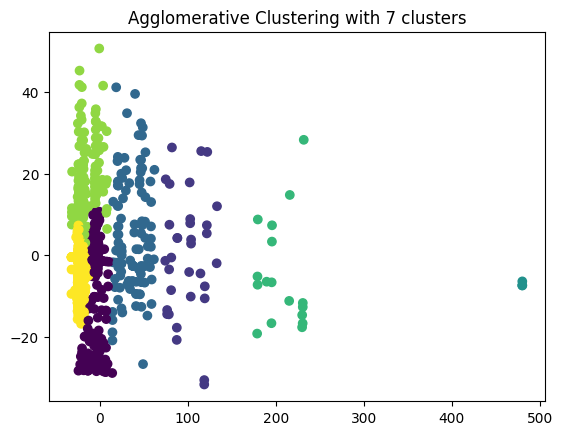

Silhouette Score: AgglomerativeClustering with 8 clusters: 0.4620535627824729

   Survived    Pclass       Sex        Age     SibSp     Parch        Fare  \
0  0.615385  1.384615  0.512821  34.521368  1.188034  0.495726   67.486148   
1  0.757576  1.000000  0.333333  32.027879  0.606061  0.787879  131.108200   
2  0.272109  2.163265  0.714286  46.452381  0.204082  0.210884   16.848214   
3  0.429907  2.018692  0.635514  29.728972  0.757009  0.719626   27.676480   
4  0.647059  1.000000  0.352941  30.058824  0.882353  1.176471  238.187253   
5  0.573333  2.640000  0.466667   6.696667  1.653333  1.213333   24.894999   
6  0.260204  2.831633  0.739796  25.348214  0.145408  0.091837    9.132992   
7  1.000000  1.000000  0.666667  35.333333  0.000000  0.333333  512.329200   

   Embarked_C  Embarked_Q  Embarked_S  
0    0.299145    0.017094    0.683761  
1    0.515152    0.000000    0.484848  
2    0.081633    0.040816    0.877551  
3    0.214953    0.056075    0.728972  
4    0.529412    0

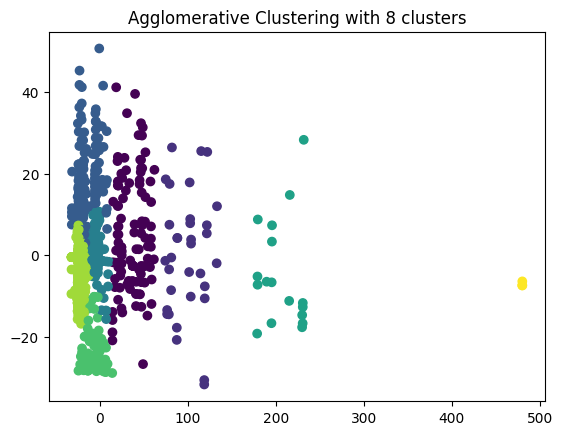

Silhouette Score: AgglomerativeClustering with 9 clusters: 0.4578876911302293

   Survived    Pclass       Sex        Age     SibSp     Parch        Fare  \
0  0.272109  2.163265  0.714286  46.452381  0.204082  0.210884   16.848214   
1  0.757576  1.000000  0.333333  32.027879  0.606061  0.787879  131.108200   
2  0.634146  1.512195  0.487805  27.048780  1.365854  0.487805   67.177437   
3  0.571429  1.085714  0.571429  52.028571  0.771429  0.514286   68.209414   
4  0.647059  1.000000  0.352941  30.058824  0.882353  1.176471  238.187253   
5  0.573333  2.640000  0.466667   6.696667  1.653333  1.213333   24.894999   
6  0.260204  2.831633  0.739796  25.348214  0.145408  0.091837    9.132992   
7  1.000000  1.000000  0.666667  35.333333  0.000000  0.333333  512.329200   
8  0.429907  2.018692  0.635514  29.728972  0.757009  0.719626   27.676480   

   Embarked_C  Embarked_Q  Embarked_S  
0    0.081633    0.040816    0.877551  
1    0.515152    0.000000    0.484848  
2    0.243902    0.0

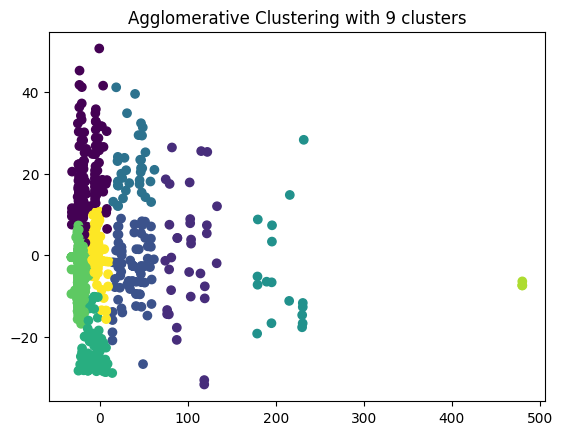

Silhouette Score: AgglomerativeClustering with 10 clusters: 0.44814916214038775

   Survived    Pclass       Sex        Age     SibSp     Parch        Fare  \
0  0.634146  1.512195  0.487805  27.048780  1.365854  0.487805   67.177437   
1  0.757576  1.000000  0.333333  32.027879  0.606061  0.787879  131.108200   
2  0.260204  2.831633  0.739796  25.348214  0.145408  0.091837    9.132992   
3  0.571429  1.085714  0.571429  52.028571  0.771429  0.514286   68.209414   
4  0.647059  1.000000  0.352941  30.058824  0.882353  1.176471  238.187253   
5  0.573333  2.640000  0.466667   6.696667  1.653333  1.213333   24.894999   
6  0.317460  1.650794  0.714286  53.880952  0.206349  0.317460   24.952314   
7  1.000000  1.000000  0.666667  35.333333  0.000000  0.333333  512.329200   
8  0.429907  2.018692  0.635514  29.728972  0.757009  0.719626   27.676480   
9  0.238095  2.547619  0.714286  40.880952  0.202381  0.130952   10.770139   

   Embarked_C  Embarked_Q  Embarked_S  
0    0.243902    0.0

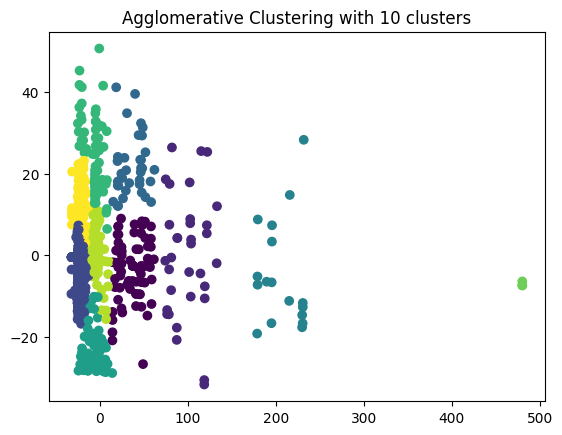

Silhouette Score: AgglomerativeClustering with 11 clusters: 0.45227067998554715

    Survived    Pclass       Sex        Age     SibSp     Parch        Fare  \
0   0.757576  1.000000  0.333333  32.027879  0.606061  0.787879  131.108200   
1   0.647059  1.000000  0.352941  30.058824  0.882353  1.176471  238.187253   
2   0.260204  2.831633  0.739796  25.348214  0.145408  0.091837    9.132992   
3   0.571429  1.085714  0.571429  52.028571  0.771429  0.514286   68.209414   
4   0.638298  1.425532  0.404255  27.382979  1.659574  0.553191   77.674732   
5   0.573333  2.640000  0.466667   6.696667  1.653333  1.213333   24.894999   
6   0.317460  1.650794  0.714286  53.880952  0.206349  0.317460   24.952314   
7   1.000000  1.000000  0.666667  35.333333  0.000000  0.333333  512.329200   
8   0.429907  2.018692  0.635514  29.728972  0.757009  0.719626   27.676480   
9   0.238095  2.547619  0.714286  40.880952  0.202381  0.130952   10.770139   
10  0.628571  1.628571  0.600000  26.600000  0.971

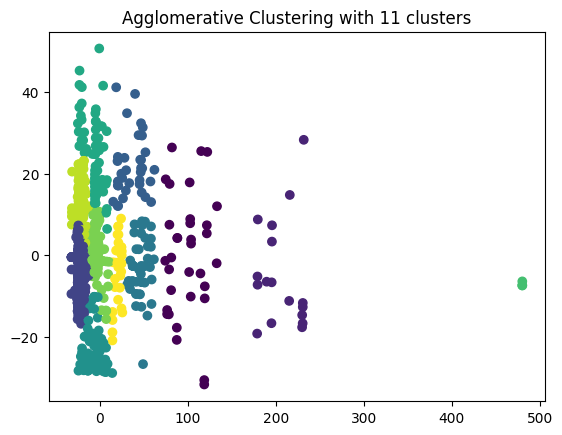

Silhouette Score: AgglomerativeClustering with 12 clusters: 0.45071091905354027

    Survived    Pclass       Sex        Age     SibSp     Parch        Fare  \
0   0.647059  1.000000  0.352941  30.058824  0.882353  1.176471  238.187253   
1   0.571429  1.085714  0.571429  52.028571  0.771429  0.514286   68.209414   
2   0.260204  2.831633  0.739796  25.348214  0.145408  0.091837    9.132992   
3   0.429907  2.018692  0.635514  29.728972  0.757009  0.719626   27.676480   
4   0.638298  1.425532  0.404255  27.382979  1.659574  0.553191   77.674732   
5   0.573333  2.640000  0.466667   6.696667  1.653333  1.213333   24.894999   
6   0.317460  1.650794  0.714286  53.880952  0.206349  0.317460   24.952314   
7   1.000000  1.000000  0.666667  35.333333  0.000000  0.333333  512.329200   
8   0.777778  1.000000  0.222222  33.328889  0.500000  0.666667  146.253467   
9   0.238095  2.547619  0.714286  40.880952  0.202381  0.130952   10.770139   
10  0.628571  1.628571  0.600000  26.600000  0.971

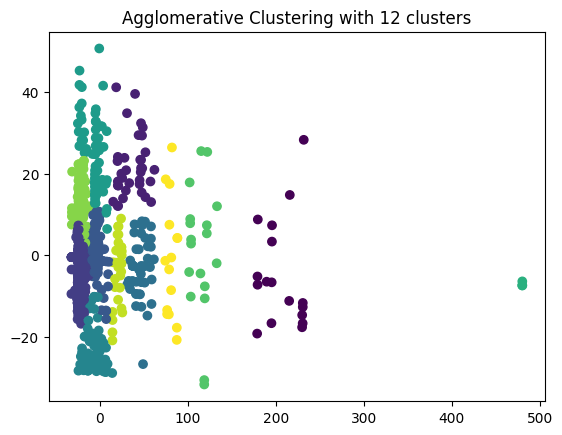

Silhouette Score: AgglomerativeClustering with 13 clusters: 0.4489662794838105

    Survived    Pclass       Sex        Age     SibSp     Parch        Fare  \
0   0.260204  2.831633  0.739796  25.348214  0.145408  0.091837    9.132992   
1   0.571429  1.085714  0.571429  52.028571  0.771429  0.514286   68.209414   
2   0.317460  1.650794  0.714286  53.880952  0.206349  0.317460   24.952314   
3   0.429907  2.018692  0.635514  29.728972  0.757009  0.719626   27.676480   
4   0.638298  1.425532  0.404255  27.382979  1.659574  0.553191   77.674732   
5   0.573333  2.640000  0.466667   6.696667  1.653333  1.213333   24.894999   
6   0.625000  1.000000  0.375000  30.375000  1.750000  2.000000  258.973950   
7   1.000000  1.000000  0.666667  35.333333  0.000000  0.333333  512.329200   
8   0.777778  1.000000  0.222222  33.328889  0.500000  0.666667  146.253467   
9   0.238095  2.547619  0.714286  40.880952  0.202381  0.130952   10.770139   
10  0.628571  1.628571  0.600000  26.600000  0.9714

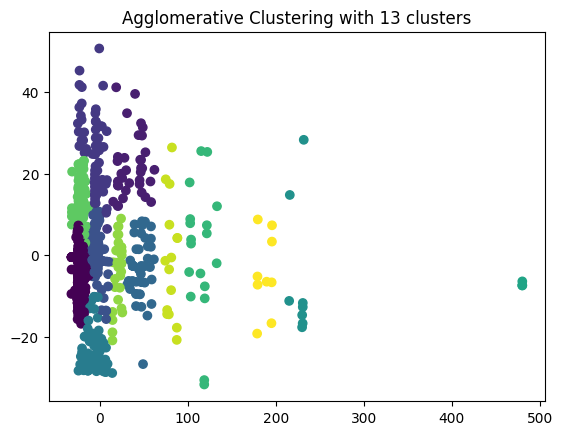

Silhouette Score: AgglomerativeClustering with 14 clusters: 0.3917782927156922

    Survived    Pclass       Sex        Age     SibSp     Parch        Fare  \
0   0.317460  1.650794  0.714286  53.880952  0.206349  0.317460   24.952314   
1   0.571429  1.085714  0.571429  52.028571  0.771429  0.514286   68.209414   
2   0.573333  2.640000  0.466667   6.696667  1.653333  1.213333   24.894999   
3   0.429907  2.018692  0.635514  29.728972  0.757009  0.719626   27.676480   
4   0.638298  1.425532  0.404255  27.382979  1.659574  0.553191   77.674732   
5   0.270161  2.794355  0.745968  28.401210  0.129032  0.100806    9.423502   
6   0.625000  1.000000  0.375000  30.375000  1.750000  2.000000  258.973950   
7   1.000000  1.000000  0.666667  35.333333  0.000000  0.333333  512.329200   
8   0.777778  1.000000  0.222222  33.328889  0.500000  0.666667  146.253467   
9   0.238095  2.547619  0.714286  40.880952  0.202381  0.130952   10.770139   
10  0.628571  1.628571  0.600000  26.600000  0.9714

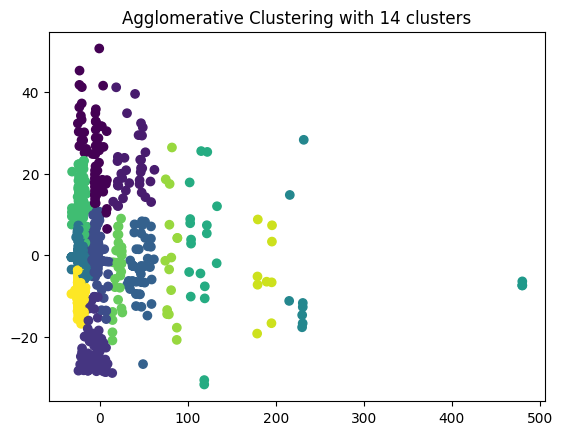

In [171]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
new_train_pca = pca.fit_transform(train_data)

for n_clusters in range(2, 15):
    cluster_labels = cluster_kmeans(train_data, n_clusters=n_clusters)
    plt.scatter(new_train_pca[:, 0], new_train_pca[:, 1], c=cluster_labels)
    plt.title(f"KMeans Clustering with {n_clusters} clusters")
    plt.show()

for n_clusters in range(2, 15):
    cluster_labels = cluster_algo(train_data, n_clusters=n_clusters)
    plt.scatter(new_train_pca[:, 0], new_train_pca[:, 1], c=cluster_labels)
    plt.title(f"Agglomerative Clustering with {n_clusters} clusters")
    plt.show()